In [182]:
import json
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


In [183]:
PATH  = os.getcwd() + "/datos/"
FileCSV=PATH+"TRAIN_FUGA-10.csv"
train=pd.read_csv(FileCSV,  sep=',')
train.head(10)

,Unnamed: 0,CODMES,TARGET_MODEL2,EDAD,SEXO,DEPARTAMENTO,INGRESO_BRUTO_M1,FLG_CLIENTE,SEGMENTO,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_VEH_SF,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,FREC_MON_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,REC_AGENTE_TD,CTD_RECLAMOS_M1
0,1,201411,0,46,F,PIURA,NaN,NO CLIENTE,2,0,0,0.0,0.0,0,0,0,0.000000,224,NaN,0
1,2,201411,0,54,M,LORETO,4718.0,CLIENTE,1BC,0,0,0.0,1.0,0,0,0,0.000000,123,NaN,0
2,3,201411,0,81,M,NaN,NaN,CLIENTE,6,0,0,NaN,NaN,0,0,0,0.000000,264,NaN,0
3,4,201411,0,42,M,PIURA,936.0,CLIENTE,2,0,0,NaN,NaN,0,0,0,0.000000,263,NaN,0
4,5,201411,0,52,M,MOQUEGUA,5844.0,CLIENTE,1BC,0,0,NaN,NaN,0,0,0,0.000000,263,NaN,0
5,6,201411,0,74,M,LA LIBERTAD,NaN,CLIENTE,6,0,0,NaN,NaN,0,0,0,0.000000,256,NaN,0
6,7,201411,0,66,M,LA LIBERTAD,4232.0,CLIENTE,1BC,0,0,0.0,0.0,0,0,6,0.000000,85,NaN,0
7,8,201411,0,57,M,LIMA,1580.0,NO CLIENTE,2,0,0,NaN,NaN,5,6,6,2.166667,151,NaN,0
8,9,201411,0,65,M,CALLAO,NaN,NO CLIENTE,2,0,0,0.0,0.0,0,0,0,3.333333,778,NaN,0
9,10,201411,0,63,M,ANCASH,936.0,CLIENTE,2,0,0,NaN,NaN,0,0,0,0.000000,272,NaN,0


In [184]:
len(train)

10

In [185]:
train.isnull().any().any()

True

In [186]:
## Hallando el porcentaje de bacios y nulos en mi data 
(train.isnull().sum() / len(train))*100

Unnamed: 0              0.0
CODMES                  0.0
TARGET_MODEL2           0.0
EDAD                    0.0
SEXO                    0.0
DEPARTAMENTO           10.0
INGRESO_BRUTO_M1       40.0
FLG_CLIENTE             0.0
SEGMENTO                0.0
FLG_ADEL_SUELDO_M1      0.0
FREC_AGENTE             0.0
FLG_VEH_SF             60.0
FLG_CONV_SF            60.0
FREC_KIOSKO             0.0
FREC_BPI_TD             0.0
FREC_MON_TD             0.0
PROM_CTD_TRX_6M         0.0
ANT_CLIENTE             0.0
REC_AGENTE_TD         100.0
CTD_RECLAMOS_M1         0.0
dtype: float64

In [187]:
## toda de data
len(train)

10

In [188]:
tipos = train.columns.to_series().groupby(train.dtypes).groups

In [189]:
# Armando lista de columnas categóricas
ctext = tipos[np.dtype('object')]
len(ctext)  # cantidad de columnas con datos categóricos. 


4

In [190]:
# Armando lista de columnas numéricas
columnas = train.columns  # lista de todas las columnas
cnum = list(set(columnas) - set(ctext))
len(cnum)


16

In [195]:
#Bucle
# Completando valores faltantas datos cuantititavos
for c in cnum:
    mean = train[c].mean()
    train[c] = train[c].fillna(mean)

In [196]:
#Bucle
# Completando valores faltantas datos categóricos
for c in ctext:
    mode = train[c].mode()[0]
    train[c] = train[c].fillna(mode)

In [199]:
## validando que no existan datos nulos en mi data
train.isnull().any().any()

True

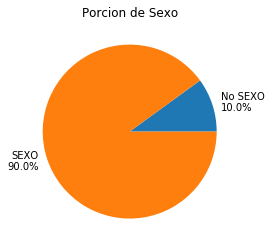

In [204]:
# Grafico de totas del porcentaje de donantes
# Agrupando por Genero
sexo = train.groupby('SEXO').SEXO.count() 
# Creando las leyendas del grafico.
labels = [ 'SEXO\n' + str(round(x * 1.0 / sexo.sum() * 
                            100.0, 2)) + '%'  for x in sexo ]

labels[0] = 'No ' + labels[0]

plt.pie(sexo, labels=labels)
plt.title('Porcion de Sexo')
plt.show()